# Inaugural Project

# Imports:

In [19]:
import numpy as np
import matplotlib.pyplot as plt 

from HouseholdSpecializationModel import HouseholdSpecializationModelClass
from loop_alpha_sigma import loop_alpha_sigma

%load_ext autoreload
%autoreload 2

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To solve this question, we ran all the values of alpha and sigma through a for loop and recording all the answers.

c:\Users\lmigu\OneDrive\Documentos\Uni\Semestre 4 (Erasmus)\Programming\coding\projects-2023-the-best-duo\inauguralproject\HouseholdSpecializationModel.py:65: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma)) ** (par.sigma/(par.sigma-1))


(α, σ) : (0.25, 0.50) --> ratio = 0.5455
(α, σ) : (0.25, 1.00) --> ratio = 0.3077
(α, σ) : (0.25, 1.50) --> ratio = 0.2143
(α, σ) : (0.50, 0.50) --> ratio = 1.0000
(α, σ) : (0.50, 1.00) --> ratio = 1.0000
(α, σ) : (0.50, 1.50) --> ratio = 1.0000
(α, σ) : (0.75, 0.50) --> ratio = 1.8333
(α, σ) : (0.75, 1.00) --> ratio = 3.2500
(α, σ) : (0.75, 1.50) --> ratio = 4.6667


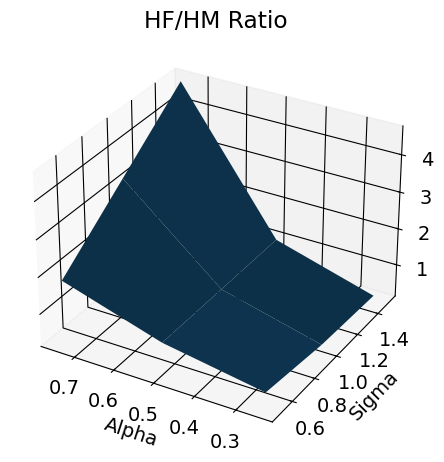

In [21]:
# a. setting parameters
alpha_vec = np.linspace(0.25,0.75,3)
sigma_vec = np.linspace(0.5,1.5,3)

# b. solve
X, Y, Z = loop_alpha_sigma(alpha_vec, sigma_vec)

# c. plot the data in 3D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot_surface(X,Y,Z)

# d. adjusting the plot
ax.invert_xaxis()

ax.set_xlabel('Alpha')
ax.set_ylabel('Sigma')
ax.set_zlabel('Ratio')
ax.set_title('HF/HM Ratio')

fig.tight_layout()

# e. show
plt.show()

As we discovered, the ratio tends to get higher for higher levels of alpha and sigma. This means that household production is highly dependent on the relative productivity of female production (alpha) and elasticity of production (beta).

# Question 2

To solve this question we used the solve_wF_vec method, which records the values of the solutions for each value of wF in the vector.


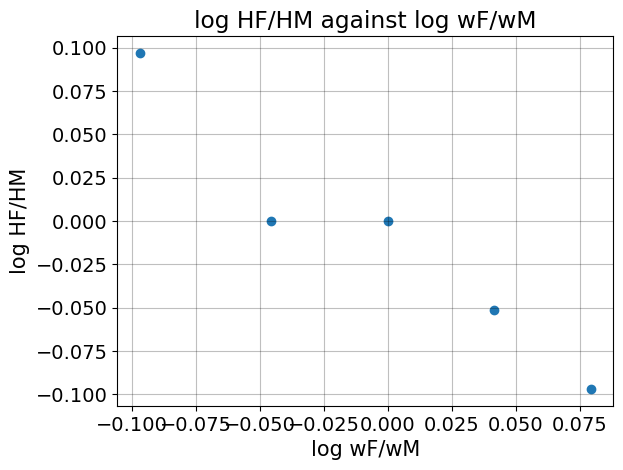

In [ ]:
# a. settings
model = HouseholdSpecializationModelClass()
model.par.wM_vec = np.ones(len(model.par.wF_vec))

# b. solve
model.solve_wF_vec(model.solve_discrete,plot=True)

# Question 3

We used the same method used in question 2, but solving continuously.

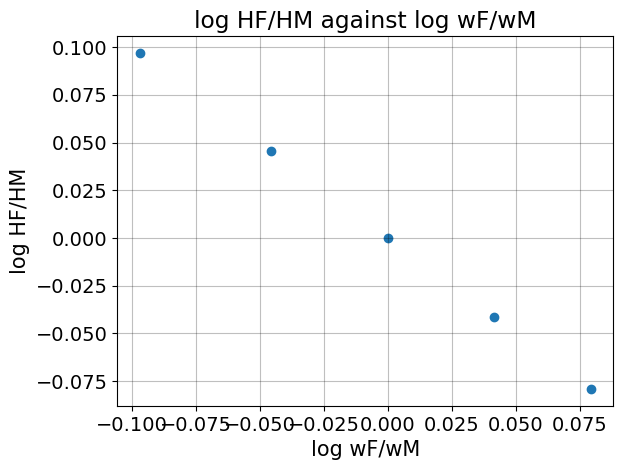

In [ ]:
# a. solve
model.solve_wF_vec(model.solve,plot=True)

# Question 4

To get the desired result we changed the bounds of alpha and sigma, from broader to narrower, to get closer results to the reality.

0.9998964049556548 0.10037206202314172


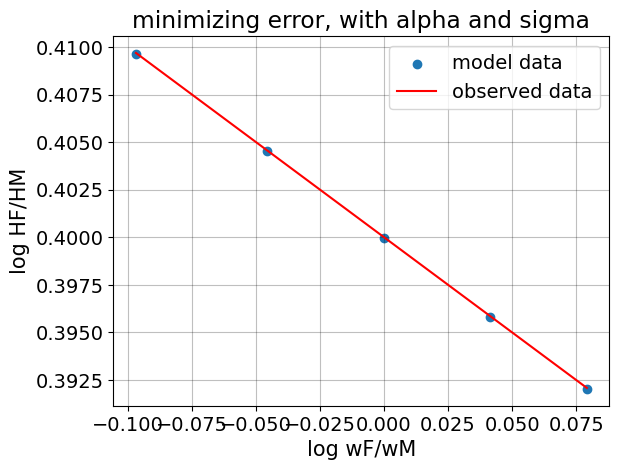

In [ ]:
# a. resseting the model
par = model.par
sol = model.sol

# b. estimate best values for alpha and sigma
model.estimate()
model.solve_wF_vec(model.solve)
print(par.alpha,par.sigma)

# c. plot model data
# plt.figure()
plt.scatter(np.log10(par.wF_vec/par.wM), np.log10(sol.HF_vec/sol.HM_vec), label='model data')

# d. plot observed data
y_model = par.beta0_target + par.beta1_target * np.log10(par.wF_vec/par.wM) 
plt.plot(np.log10(par.wF_vec/par.wM), y_model, label='observed data', color='red')

# e. plot settings
plt.xlabel("log wF/wM",size=15)
plt.ylabel("log HF/HM",size=15)
plt.title("minimizing error, with alpha and sigma")
plt.legend()
plt.show()


**Answer:**
According to our model, the best suited value for alpha is almost 1, which means that women would be way more efficient at home production than men. And since sigma is 0.1, elasticity of substitution is low, this would mean that both productions are close to being perfect complements, meaning we need both genders' home production to create home consumption.



# Question 5

**Trial 1:**
We decided to run the model by only changing sigma.

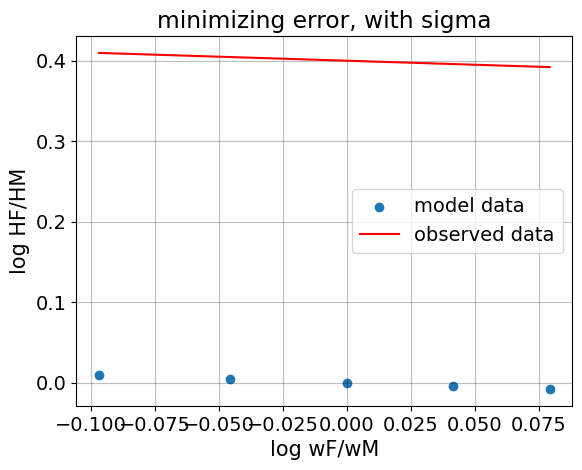

In [ ]:
# a. estimate best values for sigma
alpha = 0.5
model.estimate(alpha=alpha)

model.solve_wF_vec(model.solve)

# b. plot model data
plt.figure()
plt.scatter(np.log10(par.wF_vec/par.wM), np.log10(sol.HF_vec/sol.HM_vec), label='model data')

# c. plot observed data
y_model = par.beta0_target + par.beta1_target * np.log10(par.wF_vec/par.wM) 
plt.plot(np.log10(par.wF_vec/par.wM), y_model, label='observed data', color='red')

# d. plot settings
plt.xlabel("log wF/wM",size=15)
plt.ylabel("log HF/HM",size=15)
plt.title("minimizing error, with sigma")
plt.legend()
plt.show()

As we can see, the best value for sigma does not approximate the observed values for beta 0 and beta 1.

**Trial 2:**
We decided to also change the nu of males and females, to represent a different disutility from work between female and male agents.


c:\Users\lmigu\OneDrive\Documentos\Uni\Semestre 4 (Erasmus)\Programming\coding\projects-2023-the-best-duo\inauguralproject\HouseholdSpecializationModel.py:65: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma)) ** (par.sigma/(par.sigma-1))
c:\Users\lmigu\OneDrive\Documentos\Uni\Semestre 4 (Erasmus)\Programming\coding\projects-2023-the-best-duo\inauguralproject\HouseholdSpecializationModel.py:65: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma)) ** (par.sigma/(par.sigma-1))
c:\Users\lmigu\OneDrive\Documentos\Uni\Semestre 4 (Erasmus)\Programming\coding\projects-2023-the-best-duo\inauguralproject\HouseholdSpecializationModel.py:203: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(sol.HF_vec/sol.HM_vec)


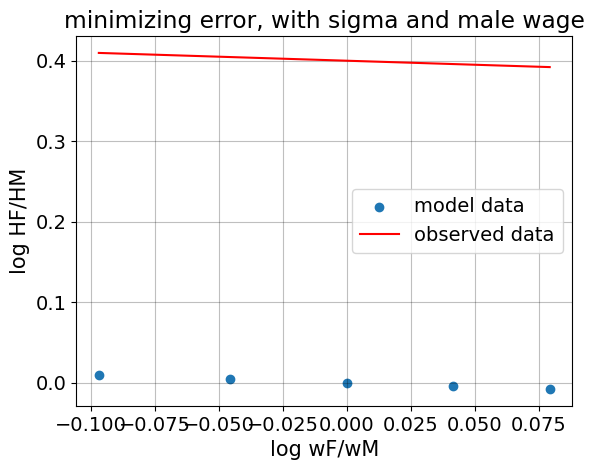

The values that minimize error are:
 Sigma = 0.100
 nuM = 0.012
 nuF = 0.013
 error = 0.160



In [23]:
model = HouseholdSpecializationModelClass()
# a. estimate best values for sigma
sigma, nuM, nuF = model.estimate_nu()
model.solve_wF_vec(model.solve)

# b. plot data 
plt.figure()
plt.scatter(np.log10(par.wF_vec/par.wM), np.log10(sol.HF_vec/sol.HM_vec), label='model data')

# c. plot observed data
y_model = par.beta0_target + par.beta1_target * np.log10(par.wF_vec/par.wM)
plt.plot(np.log10(par.wF_vec/par.wM), y_model, label='observed data', color='red')

# d. plot settings
plt.xlabel("log wF/wM",size=15)
plt.ylabel("log HF/HM",size=15)
plt.title("minimizing error, with sigma and male wage")
plt.legend()
plt.show()

error = (par.beta0_target - sol.beta0)**2 + (par.beta1_target - sol.beta1)**2

print("The values that minimize error are:\n",
      f"Sigma = {sigma:.3f}\n",
      f"nuM = {nuM:.3f}\n",
      f"nuF = {nuF:.3f}\n",
      f"error = {error:.3f}\n")


As we can see, the data is not much close to the observed data. Although it has a similar slope, it is way below the observed data. The ending values of nu are close, therefore there is not a big noticeable difference between work disutility between sexes, but they are slighly higher, which could mean that they should be adjusted to better fit the observed data.